In [1]:
from briefcase import Case, CaseBase
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import MushroomsConverter as MC
import yaml


def get_existing_test_data(cluster="corr", test_split="0.25"):

    filename = f"data/mushrooms-{cluster}-test-{test_split}.yaml"
    
    try:
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        print(f"Loaded data successfully from '{filename}'")
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        print(f"Creating new file")
        data = MC.mushroom_to_yaml(cluster, float(test_split))
    except Exception as e:
        print("An error occurred:", str(e))
        
    return data 

def test_inconsistency(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases)  # Todo this is really really slow, but do we care?
    return cb.metrics()


def generate_data_and_plot(cluster="corr"):
    percentage_test = [0.05, 0.25, 0.5, 0.75]
    inconsistency_counts = []
    test_sizes = []

    for param in percentage_test:
        test_data = get_existing_test_data(cluster, str(param))
        test_size, inconsistency_count = test_inconsistency(test_data)
        test_sizes.append(test_size)
        inconsistency_counts.append(inconsistency_count)

    # Create a DataFrame
    df = pd.DataFrame({
        'Number of entries in test data': test_sizes,
        'Inconsistency Count': inconsistency_counts
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Number of entries in test data'], df['Inconsistency Count'], marker='o', linestyle='-')
    plt.title(f'Test Inconsistency vs Size of test data for {cluster} clustering')
    plt.xlabel('Number of entries in test data')
    plt.ylabel('Inconsistency Count')
    plt.grid(True)
    plt.show()


importing Jupyter notebook from MushroomsConverter.ipynb


### Random clustering
This does not technically depend on the size of the training data, since the training data is never used, but for comparability we will test it on the same splits

File 'data/mushrooms-rand-test-0.05.yaml' not found.
Creating new file
Number of cases:  406
Number of inconsistencies:  0
File 'data/mushrooms-rand-test-0.25.yaml' not found.
Creating new file
Number of cases:  2031
Number of inconsistencies:  0
File 'data/mushrooms-rand-test-0.5.yaml' not found.
Creating new file
Number of cases:  4062
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.75.yaml'
Number of cases:  6093
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.95.yaml'
Number of cases:  7717
Number of inconsistencies:  0


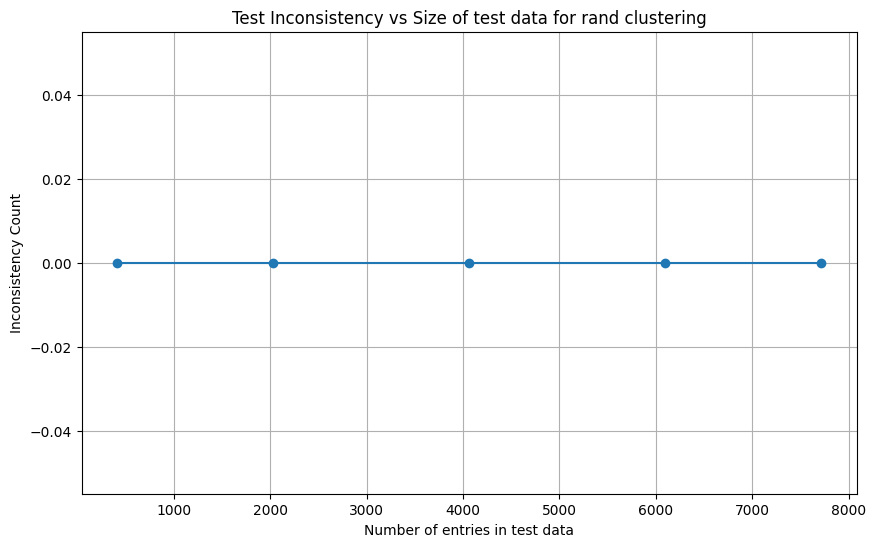

In [3]:
generate_data_and_plot("rand") # random seed = 42

Loaded data successfully from 'data/mushrooms-rand-test-0.05.yaml'
Number of cases:  406
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.25.yaml'
Number of cases:  2031
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.5.yaml'
Number of cases:  4062
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.75.yaml'
Number of cases:  6093
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-rand-test-0.95.yaml'
Number of cases:  7717
Number of inconsistencies:  0


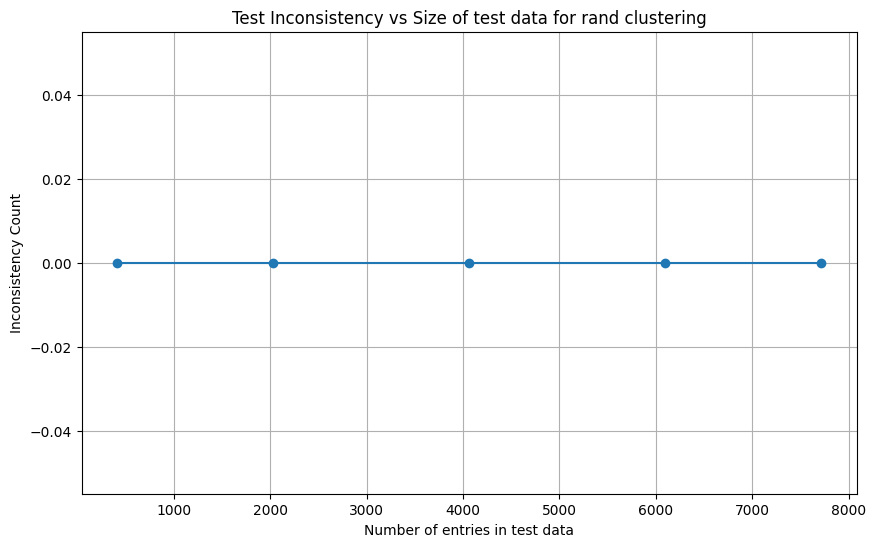

In [2]:
generate_data_and_plot("rand") # random seed = 32

File 'data/mushrooms-rand_un-test-0.05.yaml' not found.
Creating new file
Number of cases:  406
Number of inconsistencies:  14
File 'data/mushrooms-rand_un-test-0.25.yaml' not found.
Creating new file
Number of cases:  2031
Number of inconsistencies:  41
File 'data/mushrooms-rand_un-test-0.5.yaml' not found.
Creating new file
Number of cases:  4062
Number of inconsistencies:  58
File 'data/mushrooms-rand_un-test-0.75.yaml' not found.
Creating new file
Number of cases:  6093
Number of inconsistencies:  72
File 'data/mushrooms-rand_un-test-0.95.yaml' not found.
Creating new file
Number of cases:  7717
Number of inconsistencies:  73


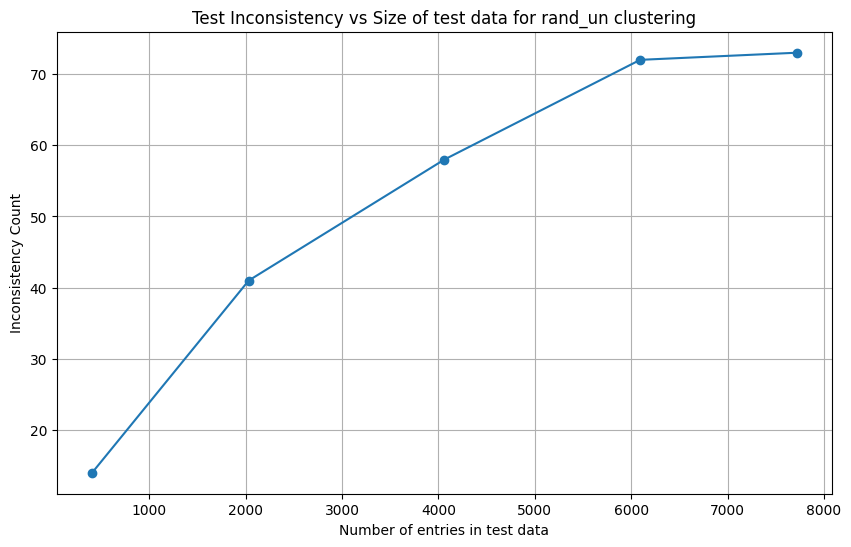

In [4]:
generate_data_and_plot("rand_un") # random seed = 42

File 'data/mushrooms-rand_un-test-0.05.yaml' not found.
Creating new file
Number of cases:  406
Number of inconsistencies:  6
File 'data/mushrooms-rand_un-test-0.25.yaml' not found.
Creating new file
Number of cases:  2031
Number of inconsistencies:  47
File 'data/mushrooms-rand_un-test-0.5.yaml' not found.
Creating new file
Number of cases:  4062
Number of inconsistencies:  58
File 'data/mushrooms-rand_un-test-0.75.yaml' not found.
Creating new file
Number of cases:  6093
Number of inconsistencies:  89
File 'data/mushrooms-rand_un-test-0.95.yaml' not found.
Creating new file
Number of cases:  7717
Number of inconsistencies:  95


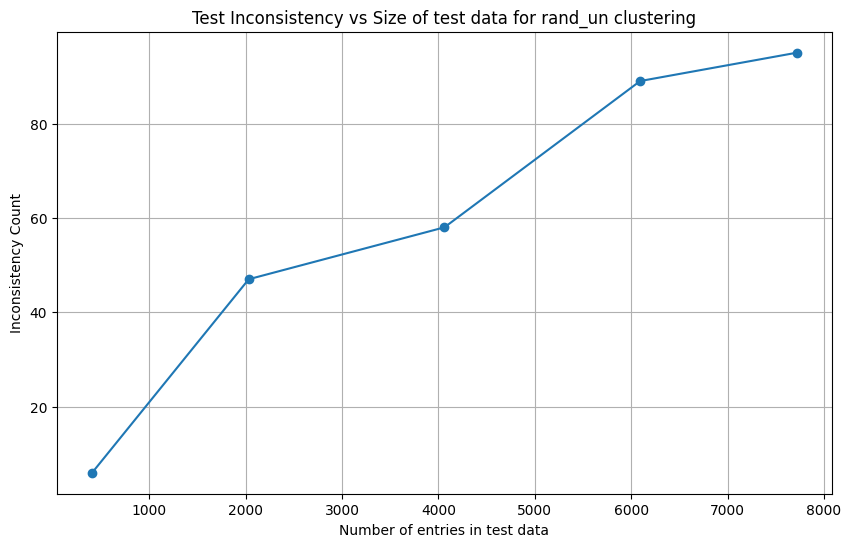

In [2]:
generate_data_and_plot("rand_un") # random seed = 32


File 'data/mushrooms-corr-test-0.05.yaml' not found.
Creating new file
Number of cases:  406
Number of inconsistencies:  0
File 'data/mushrooms-corr-test-0.25.yaml' not found.
Creating new file
Number of cases:  2031
Number of inconsistencies:  0
File 'data/mushrooms-corr-test-0.5.yaml' not found.
Creating new file
Number of cases:  4062
Number of inconsistencies:  0
File 'data/mushrooms-corr-test-0.75.yaml' not found.
Creating new file
Number of cases:  6093
Number of inconsistencies:  0


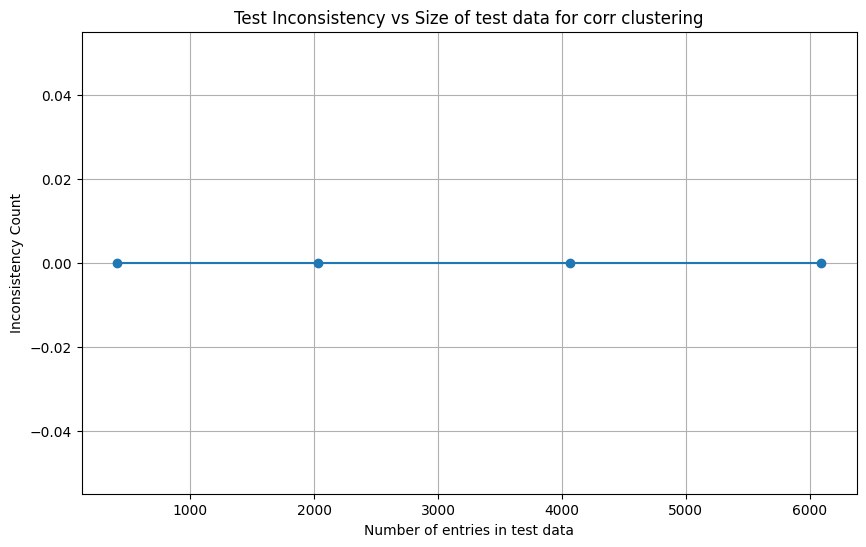

In [2]:
generate_data_and_plot("corr") # Todo - for some reason, this is a hell of a lot slower than the other two? 


Loaded data successfully from 'data/mushrooms-vote-test-0.05.yaml'
Number of cases:  406
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-vote-test-0.25.yaml'
Number of cases:  2031
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-vote-test-0.5.yaml'
Number of cases:  4062
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-vote-test-0.75.yaml'
Number of cases:  6093
Number of inconsistencies:  0
Loaded data successfully from 'data/mushrooms-vote-test-0.95.yaml'
Number of cases:  7717
Number of inconsistencies:  0


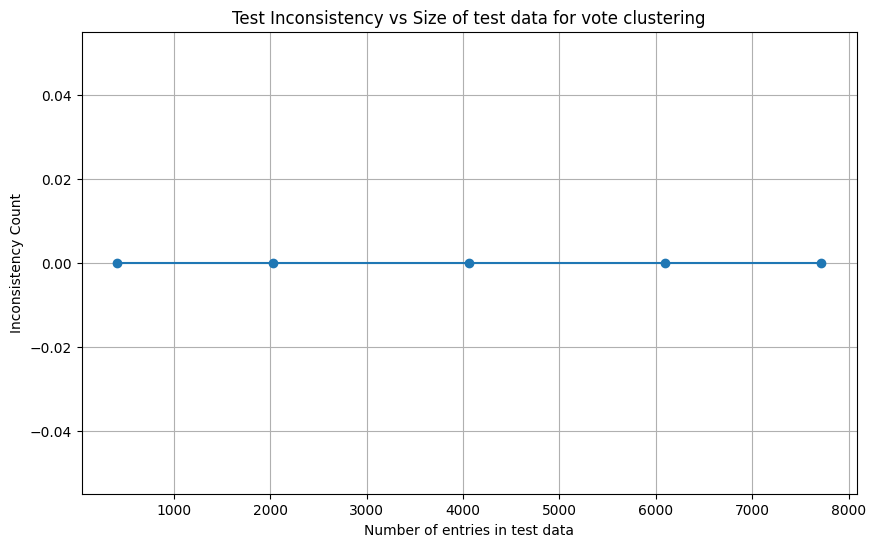

In [8]:
generate_data_and_plot("vote")
